# Analysis and Prediction of Video Games sales using Machine Learning Algorithms !

### _Video games have been around for decades, providing entertainment for children and adults alike. <br>_

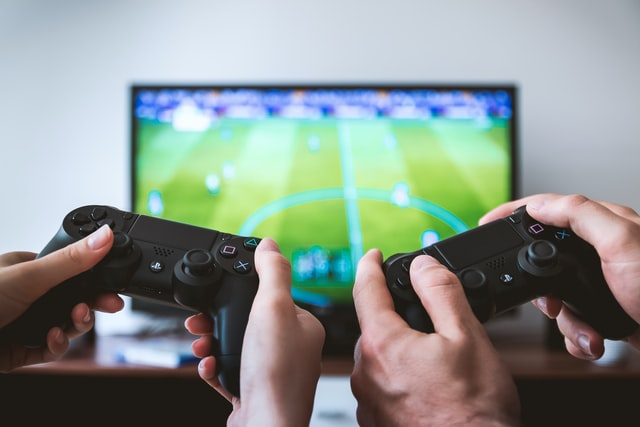

### _They have evolved significantly from the early days of computer games and the first versions of Nintendo and Atari. <br>The days of pixelated screens and limited sounds are a distant memory as video games have become more lifelike than ever.<br> As technology continues to improve, so do video games._

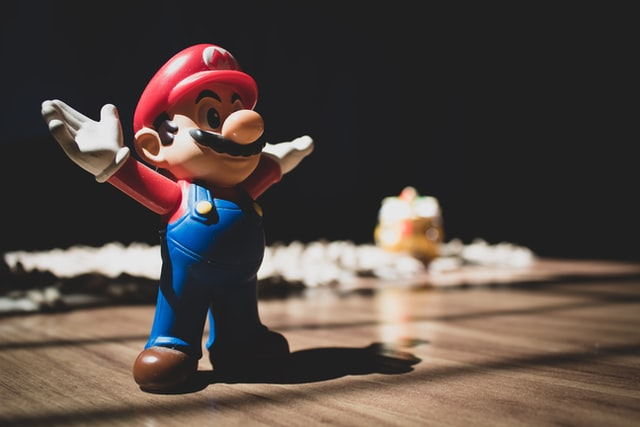

### _Video game creation has become increasingly complex, and the cost of creating a game to run on one of the major consoles has risen with this greater complexity.<br> It was once unthinkable to sink millions into development costs,<br> but games today can cost tens and even hundreds of millions. <br>This has pushed game development into Hollywood movie territory in terms of production and marketing costs._

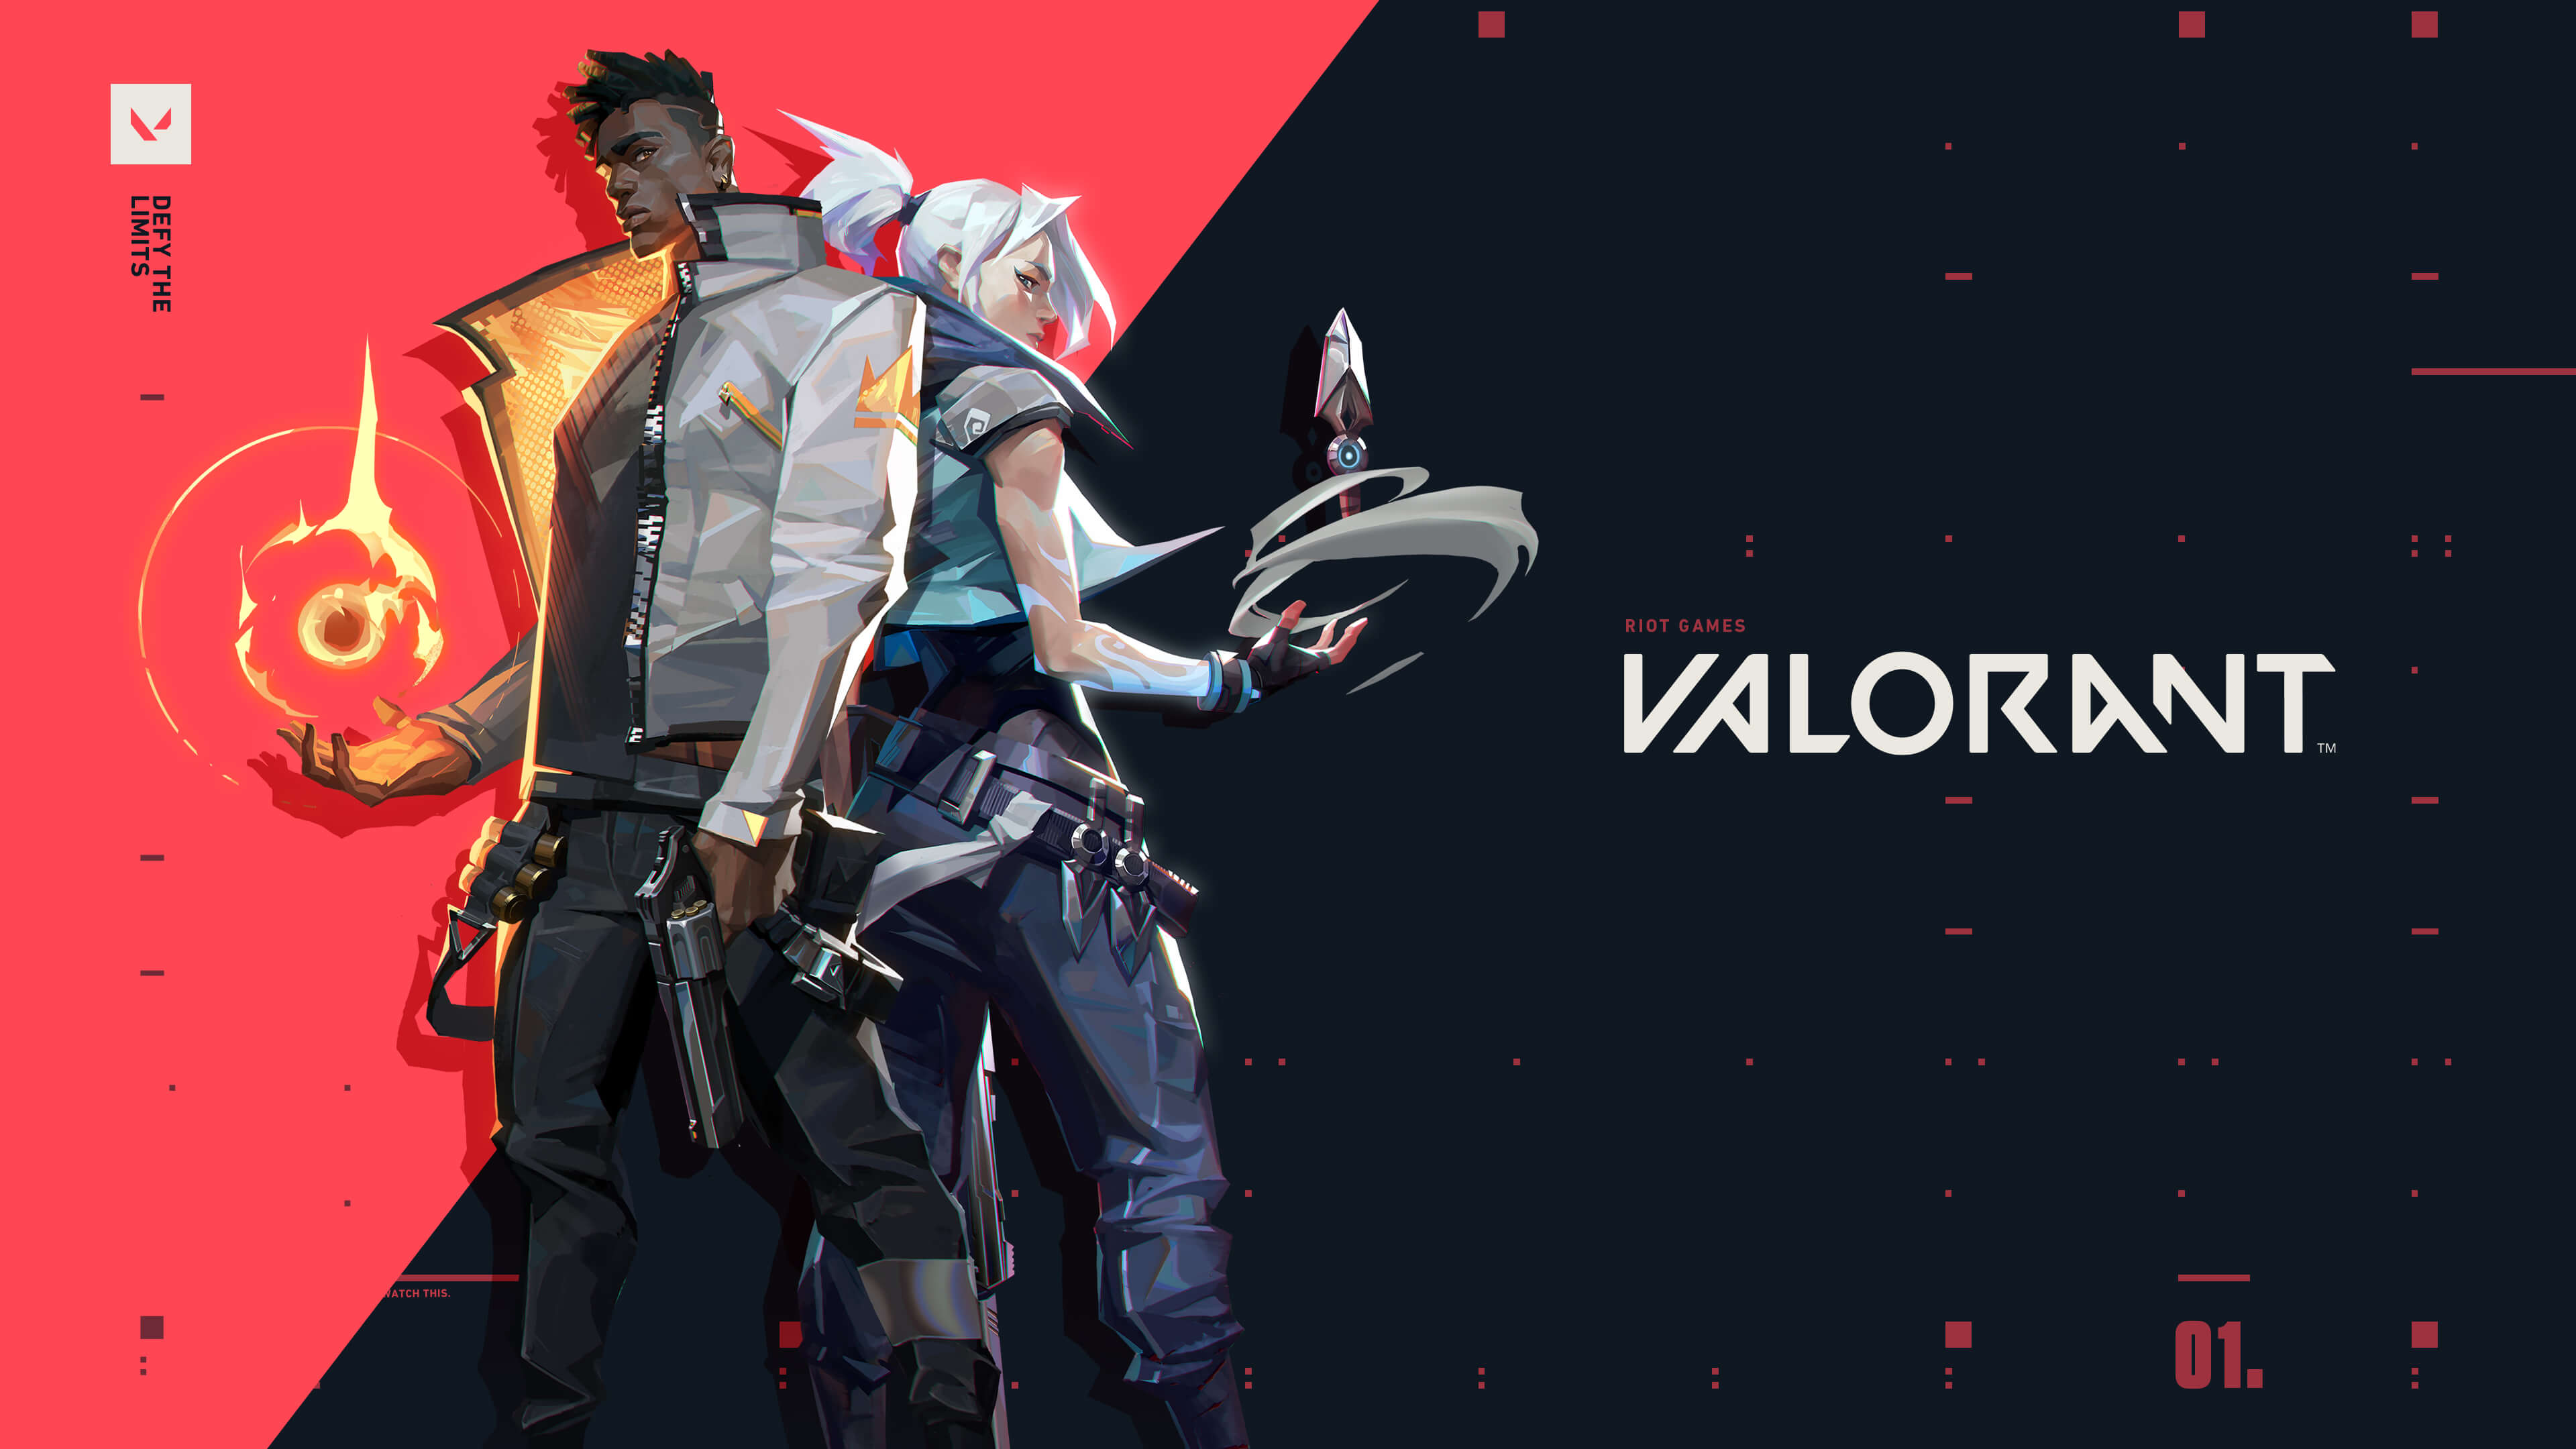

### _The video game sector is immensely large. In fact, it is larger than the movie and music industry combined,<br> and it is only growing.<br> Though it doesn't get the same attention that the movie and music industry does,<br> there are over two billion gamers across the world. <br>That is 26% of the world's population._

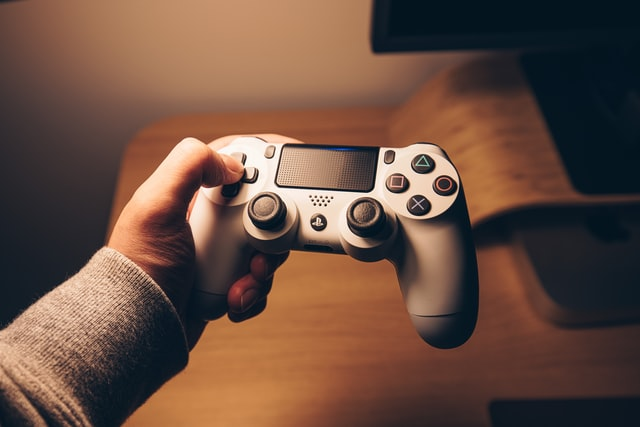

---
---
# _Importing Libraries_

In [3]:
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## _Using Plotly for Visualizations_

In [6]:
from plotly import graph_objects as go
from plotly import express as px
from plotly.offline import init_notebook_mode,iplot

# _Reading Dataset_

In [7]:
df = pd.read_csv('video games data.csv')

In [8]:
df.head()

Name Platform    Year         Genre Publisher  \
0                Wii Sports      Wii  2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

# _Checking for null values_

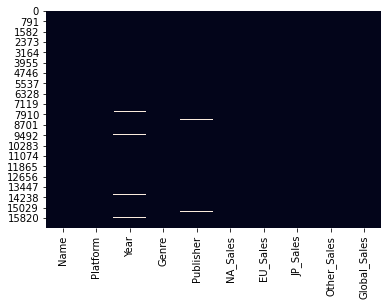

In [9]:
sns.heatmap(df.isnull(), cbar=False)

In [9]:
 df = df.dropna()

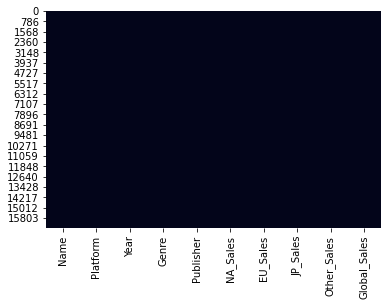

In [10]:
sns.heatmap(df.isnull(), cbar=False)

_Null values has been taken care of_

---

# _Exploratory Data Analysis and Visualization :_

In [8]:
df.shape

(16291, 10)

In [9]:
df.describe()

Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    2006.405561      0.265647      0.147731      0.078833      0.048426   
std        5.832412      0.822432      0.509303      0.311879      0.190083   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16291.000000  
mean       0.540910  
std        1.567345  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.480000  
max       82.740000

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


## _Using Correlation to plot heatmap_

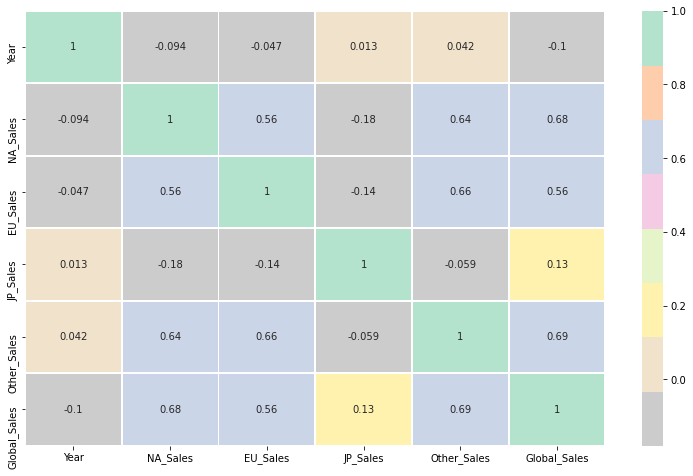

In [20]:
corr = df.corr(method='kendall')
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True, cmap="Pastel2_r", linewidths=.9)

In [21]:
df.head()

Name Platform    Year         Genre Publisher  \
0                Wii Sports      Wii  2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

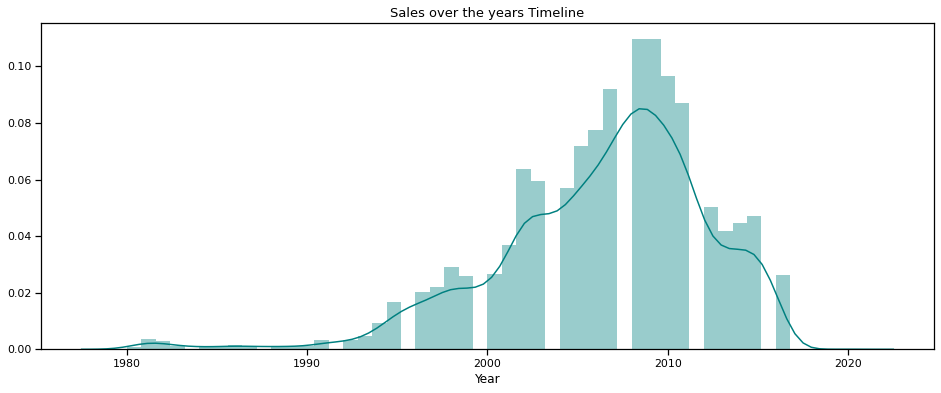

In [24]:
plt.figure(figsize=(16,6))
sns.distplot(df['Year'], color = 'teal')
plt.title('Sales over the years Timeline', size = 13)
plt.show()

Text(0.5, 1.0, 'Video games platforms representing frequency in the dataset')

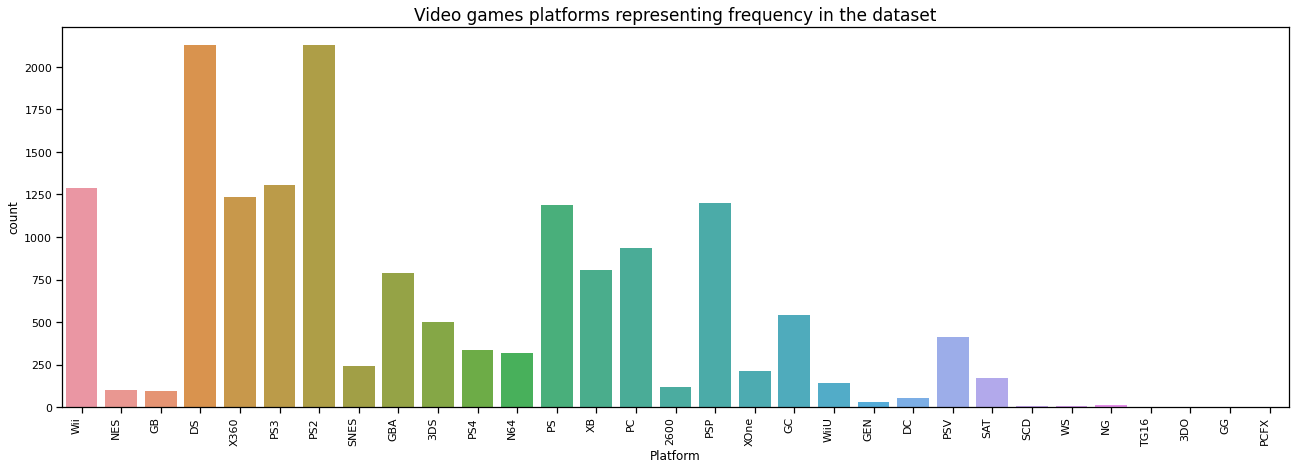

In [23]:
plt.figure(figsize=(22,7))
g =sns.countplot(df.Platform)
sns.set_context('notebook')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title("Video games platforms representing frequency in the dataset", size =17)

Text(0.5, 1.0, 'Diversity of the games :')

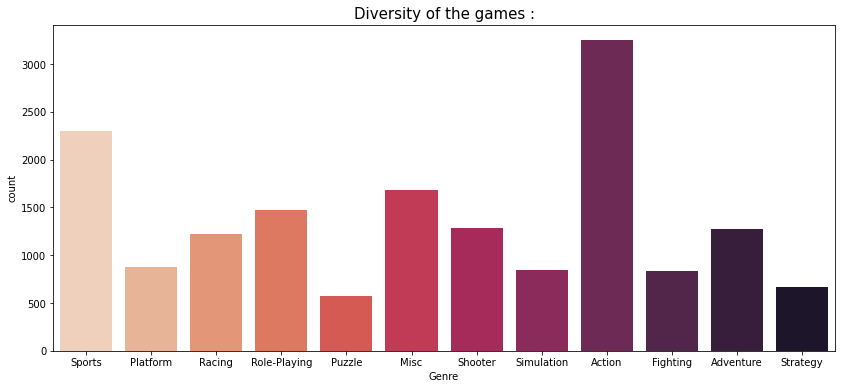

In [11]:
plt.figure(figsize=(14,6))
g = sns.countplot(x='Genre',data=df, palette='rocket_r')
plt.title("Diversity of the games :", size =15)

In [12]:
top_sales = df.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False).head(10)

dicts_name = {
    'NA_Sales' : "North America Sales",
    'EU_Sales' : "Europe Sales",
    'JP_Sales' : "Japan Sales",
    'Other_Sales' : "Other Sales",
}

for (key, title) in dicts_name.items():
    
    fig = px.sunburst(top_sales, path=['Genre', 'Publisher', 'Platform'], values=key, title= 'Top Selling by '+ title)
    
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=40, l=2, r=2, b=5)
    )

    fig.show()

In [13]:
fig = px.scatter(df, x="Year", y="Global_Sales", color="Genre",
                 size='Global_Sales', hover_data=['Name'],
                 title="Year Wise Global Video Game Sales by Genere",
                 labels={'x':'Years', 'y':'Global Sales In Millions'}
                )

fig.show()

---
---
---

# _Data Preprocessing_

### _using LabelEncoder_

In [37]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()
feature = ["Platform", "Genre"]
for col in feature:
    df[col] = le.fit_transform(df[col])

---
---
# Making the Model -

In [40]:
df.head()

Name  Platform    Year  Genre Publisher  NA_Sales  \
0                Wii Sports        26  2006.0     10  Nintendo     41.49   
1         Super Mario Bros.        11  1985.0      4  Nintendo     29.08   
2            Mario Kart Wii        26  2008.0      6  Nintendo     15.85   
3         Wii Sports Resort        26  2009.0     10  Nintendo     15.75   
4  Pokemon Red/Pokemon Blue         5  1996.0      7  Nintendo     11.27   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37

# _Independent and dependent features_

In [41]:
X = df[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

In [43]:
y = df['Global_Sales'].values

# _Train-Test split_

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

---
---

# Now, Training the Model 

# _Using Linear Regression_

In [47]:
from sklearn import linear_model

In [48]:
linreg =linear_model.LinearRegression()
linreg_model = linreg.fit(X_train,y_train)

In [49]:
 linreg_pred =linreg_model.predict(X_test)

### _Plotting the Prediction of Linear Regression Model_

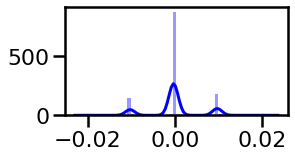

In [69]:
plt.figure(figsize=(4,2))
sns.set_context("poster")
sns.distplot(y_test-linreg_pred, color ="blue")

In [55]:
from sklearn import metrics

In [56]:
print('Mean Absolute Error of Linear Regresson:', metrics.mean_absolute_error(y_test, linreg_pred))

Mean Absolute Error of Linear Regresson: 0.0030633517245304835


In [58]:
print('Root Mean Squared Error of Linear Regresson:', np.sqrt(metrics.mean_squared_error(y_test, linreg_pred)))

Root Mean Squared Error of Linear Regresson: 0.005357751995977096


### _Now, the best fit line for the linear regressor model_

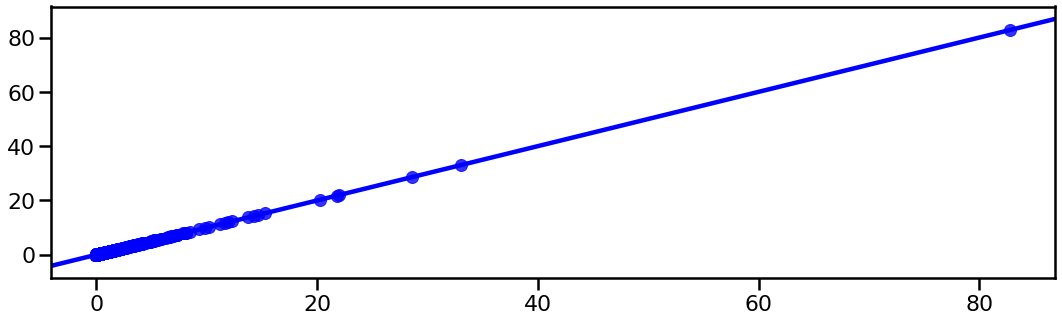

In [70]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
sns.regplot(y_test,linreg_pred, color ='blue')

# _Using ExtraTreesRegressor_

In [61]:
from sklearn.ensemble import ExtraTreesRegressor

In [62]:
etr=ExtraTreesRegressor(n_estimators = 120)

In [63]:
etr.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=120)

In [64]:
etr.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=120)

In [65]:
 etr_pred=etr.predict(X_test)

In [66]:
etr_pred

array([0.55875   , 0.05366667, 0.19      , ..., 0.092     , 0.135     ,
       0.1810625 ])

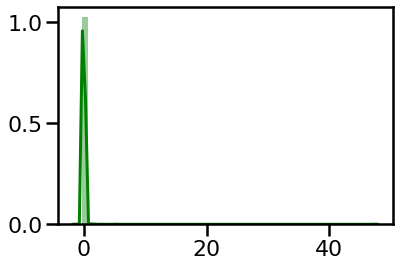

In [68]:
plt.figure(figsize=(6,4))
sns.set_context("poster")
sns.distplot(y_test-etr_pred, color ="green")

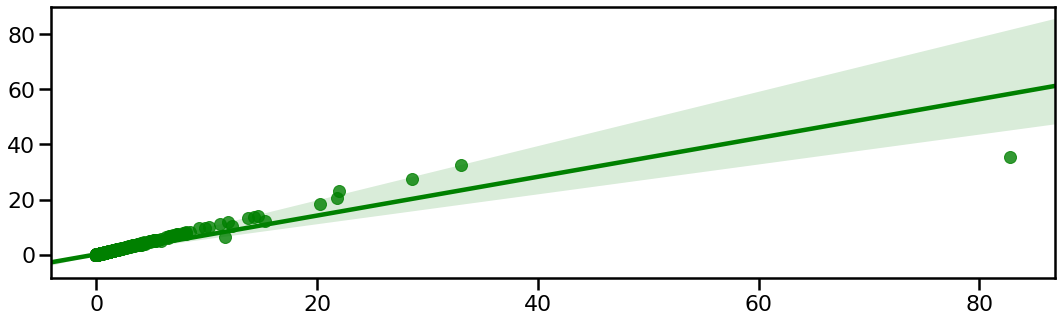

In [80]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
sns.regplot(y_test,etr_pred, color ='green')

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, etr_pred))

Mean Absolute Error: 0.03031780617385865


In [75]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, etr_pred)))

Root Mean Squared Error: 0.8395173228424854


---
---
# _Using Random Forest Regressor_

In [76]:
from sklearn.ensemble import RandomForestRegressor


In [77]:
 rf = RandomForestRegressor(n_jobs=-1)
rf_model = rf.fit(X_train,y_train)

In [78]:
rf_pred =rf_model.predict(X_test)

In [79]:
rf_pred

array([0.5616    , 0.043405  , 0.19      , ..., 0.09200779, 0.13448833,
       0.18313167])

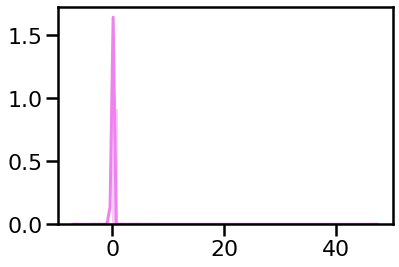

In [82]:
plt.figure(figsize=(6,4))
sns.set_context("poster")
sns.distplot(y_test-rf_pred, color ="violet")

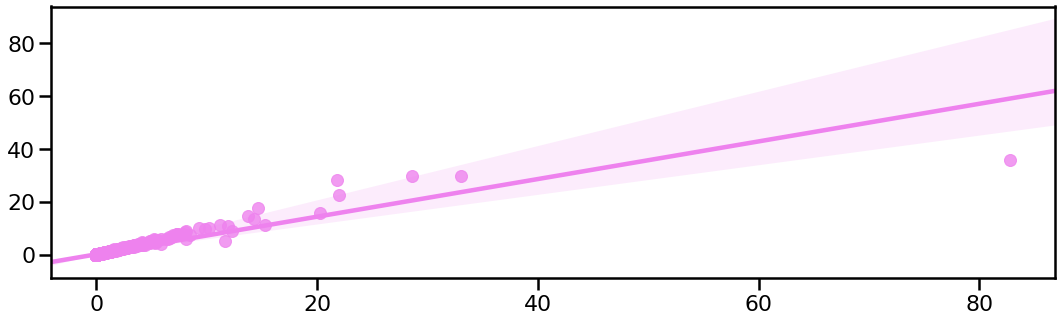

In [84]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
sns.regplot(y_test,rf_pred, color ='violet')

In [86]:
 print('Mean Absolute Error of Random Forest Regressor:', metrics.mean_absolute_error(y_test, rf_pred))


Mean Absolute Error of Random Forest Regressor: 0.04157920742778209


In [88]:
print('Root Mean Squared Errorof Random Forest Regressor :', np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

Root Mean Squared Errorof Random Forest Regressor : 0.8557646768220916


---
---
# _Using XGBoost Regressor_

In [89]:
from xgboost import XGBRegressor

In [90]:
 xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

In [91]:
xgb_model = xgb_reg.fit(X_train, y_train)

In [92]:
 xgb_pred =xgb_model.predict(X_test)

In [93]:
xgb_pred

array([0.58837044, 0.06545856, 0.20795743, ..., 0.09226622, 0.15495472,
       0.16958055], dtype=float32)

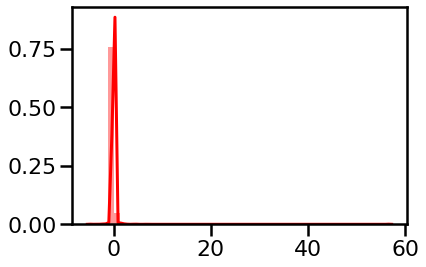

In [95]:
plt.figure(figsize=(6,4))
sns.set_context("poster")
sns.distplot(y_test-xgb_pred, color ="red")

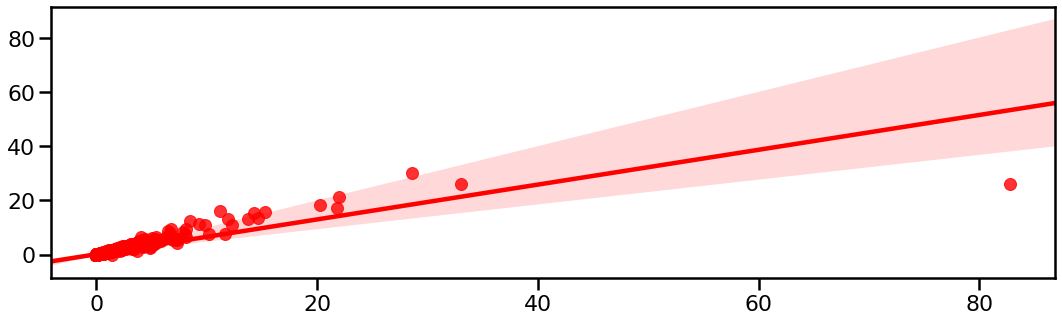

In [96]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
sns.regplot(y_test,xgb_pred, color ='red')

In [97]:
print('Mean Absolute Error of XGBoost Regressor:', metrics.mean_absolute_error(y_test, xgb_pred))

Mean Absolute Error of XGBoost Regressor: 0.08328596563209488


In [98]:
print('Root Mean Squared Error of XGBoost Regressor:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

Root Mean Squared Error of XGBoost Regressor: 1.0304175022104824


---
---
---
# _CONCLUSION -_
---

### _I have done Analysis as well as visualization of the Dataset. <br> And I have Trained the model using:_


- ### _Linear Regression_
- ### _Extra Trees Regressor_
- ### _Random Forest Regressor_
- ### _XGBoost Regressor_

---
## _From the above 4 trained Models, It can be seen that  <br><br> the Linear Regressor model performed better than the rest of the three models._